# Exercise 4.1: Principal Component Analysis

In the current exercise, we will explore some properties, as well as limits, of Principal Component Analysis.

### Exploring data and plotting the Principal Components
__Task__: Given the two-dimensional zero-mean unlabeled dataset, compute and plot the Principal Components (PC) together with the scatter plot of the data. Use the eigenvalue decomposition of the covariance matrix of the data to find the PC.

__Hint 1__: The directions of the PCs are given by the eigenvectors of the sample covariance matrix.

__Hint 2__: Scale length of the PCs using the square root of the eigenvalues of sample covariance matrix.

Text(0, 0.5, 'x2')

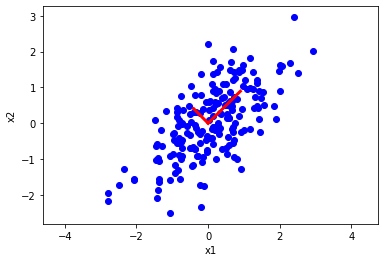

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Load data
X = np.loadtxt('data/PCA_1.data')
N_samples = X.shape[0]

# compute covariance matrix
sample_cov = np.cov(X,rowvar=0)

# compute eigenvalue decomposition and sort eigenvalues if necessary
s,u = np.linalg.eig(sample_cov)
idx_ordered =  np.argsort(s)[::-1]
u = u[:,idx_ordered]  
s = s[idx_ordered]

# plot
plt.scatter(X[:,0],X[:,1],c='b')
for idx_col in range(u.shape[1]):
    plt.plot([0,u[0,idx_col]*np.sqrt(s[idx_col])],[0,u[1,idx_col]*np.sqrt(s[idx_col])],c='r',lw=3)
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')

__Important note__ : Computational complexity of calculating the eigenvalue decomposition grows cubically with the number of features. Therefore, iterative approaches for computing the PCs are prefered when dealing with high dimensional data.

### How outliers and scaling of the data affect PCA

The following dataset is similar to the one analyzed before, however it contains outliers. Explore the PCs again in the presence of outliers.

__Task:__ Compute and plot the Principal Components (PC) together with the scatter plot of the data.

__Q4.1.1 Why and how is PCA prone to fail in the presence of outliers?__

__Answer:__ The criterion used by PCA to identified the most relevant components is based on the covariance of the data. The presence of outliers in the data affects the sample variance/covariance of it, thus deviating the identified components from the true relevant ones.

__Q4.1.2 How does the scaling of the features affect PCA? For example: Using cm instead of meters.__

__Answer__: Scaling of a variable is directly reflected on the variance of a given variable. Given that the criterion used by PCA is the variance of the variables to assess their contribution to the projection, any variable with a variance distorted by scaling will dominate the identified PC.

__Hint:__ PCA uses variance of the data as criterion to find the PCs.

Text(0, 0.5, 'x2')

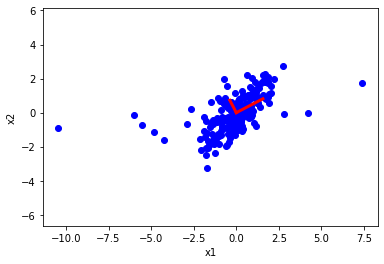

In [2]:
# load data
X = np.loadtxt('data/PCA_2.data')
N_samples = X.shape[0]

# compute covariance matrix
sample_cov = np.cov(X,rowvar=0)

# compute eigenvalue decomposition of covariance matrix. Order eigenvalues if necessary
s,u = np.linalg.eig(sample_cov)
idx_ordered =  np.argsort(s)[::-1]
u = u[:,idx_ordered]  
s = s[idx_ordered]

# plot
plt.scatter(X[:,0],X[:,1],c='b')
for idx_col in range(u.shape[1]):
    plt.plot([0,u[0,idx_col]*np.sqrt(s[idx_col])],[0,u[1,idx_col]*np.sqrt(s[idx_col])],c='r',lw=3)
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')

### Dimensionality reduction with PCA as preprocessing for classification problems

In the following exercise, we will see how PCA can be used to reduce the dimensionality of a dataset as a pre-processing stage for a classification task.

__Task 3__: For the first dataset, plot the PC together with the scatter plot of the labelled data. Set the color of each of the points according to its class.

__Task 4__: Project the data onto each of the PC and plot the projection. 

__Q4.1.3 Which of the PC is more adequate to perform dimensionality reduction in the labelled dataset?__

__Answer:__ In this case, the first PC (the most relevant PC according to the eigenvalue criterion) provides the best separability of the two classes.


/Users/mariejakob/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/mariejakob/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/mariejakob/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/mariejakob/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


Text(0.5, 1.0, 'Projection on the second PC')

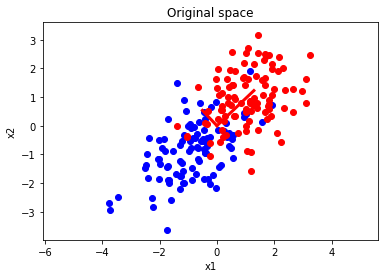

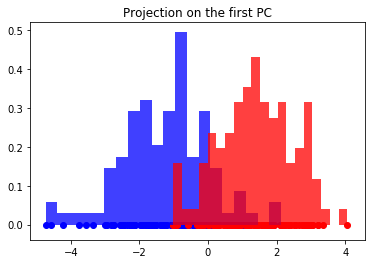

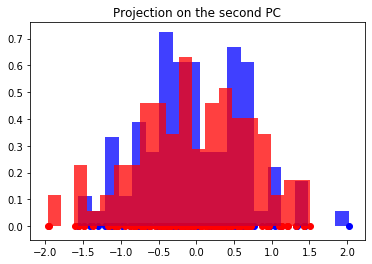

In [3]:
# load data
X = np.loadtxt('data/PCA_3.data')
y = np.loadtxt('data/PCA_3.labels')
N_samples = X.shape[0]

# compute covariance matrix
sample_cov = np.cov(X,rowvar=0)

# compute eigenvalue decomposition of covariance matrix. Order eigenvalues if necessary
s,u = np.linalg.eig(sample_cov)
idx_ordered =  np.argsort(s)[::-1]
u = u[:,idx_ordered]  
s = s[idx_ordered]

# plot original data
plt.scatter(X[y==0,0],X[y==0,1],c='b')
plt.scatter(X[y==1,0],X[y==1,1],c='r')
for idx_col in range(u.shape[1]):
    plt.plot([0,u[0,idx_col]*np.sqrt(s[idx_col])],[0,u[1,idx_col]*np.sqrt(s[idx_col])],c='r',lw=3)
plt.axis('equal')
plt.title('Original space')
plt.xlabel('x1')
plt.ylabel('x2')

# plot data projection (first eigenvector)
X_proj = np.dot(X,u[:,0])
plt.figure()
plt.scatter(X_proj[y==0],np.zeros(int(N_samples/2)),c='b')
plt.scatter(X_proj[y==1],np.zeros(int(N_samples/2)),c='r')
plt.hist(X_proj[y==0], 20, normed=1, facecolor='b', alpha=0.75)
plt.hist(X_proj[y==1], 20, normed=1, facecolor='r', alpha=0.75)
plt.title('Projection on the first PC')

# plot data projection (second eigenvector)
X_proj = np.dot(X,u[:,1])
plt.figure()
plt.scatter(X_proj[y==0],np.zeros(int(N_samples/2)),c='b')
plt.scatter(X_proj[y==1],np.zeros(int(N_samples/2)),c='r')
plt.hist(X_proj[y==0], 20, normed=1, facecolor='b', alpha=0.75)
plt.hist(X_proj[y==1], 20, normed=1, facecolor='r', alpha=0.75)
plt.title('Projection on the second PC')

__Task 5__ Repeat tasks 3 and 4 for the following dataset.

__Q4.1.4 What is the most relevant PC in this case, given that the goal is to perform dimensionality reduction for a classification task?__

__Answer:__ In this case, the projection onto the second most relevant component is the one providing the best separability between both classes. Given that PCA is an unsupervised technique -it does not use the information provided by the labels-, the PCs do not contain information about class-separability. Instead, it provides only information about the best way to represent the variance in the data, without regard to their labels.

/Users/mariejakob/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/mariejakob/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/mariejakob/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/mariejakob/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


Text(0.5, 1.0, 'Projection on the second PC')

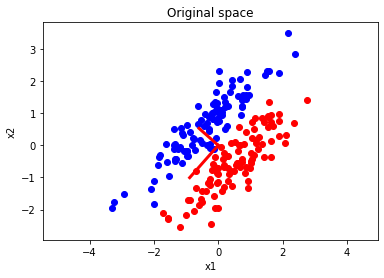

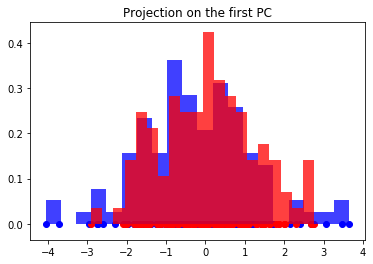

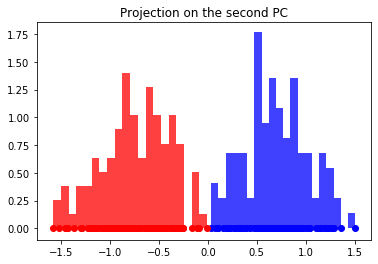

In [4]:
# load data
X = np.loadtxt('data/PCA_4.data')
y = np.loadtxt('data/PCA_4.labels')
N_samples = X.shape[0]

# compute covariance matrix
sample_cov = np.cov(X,rowvar=0)

# compute eigenvalue decomposition of covariance matrix. Order eigenvalues if necessary
s,u = np.linalg.eig(sample_cov)
idx_ordered =  np.argsort(s)[::-1]
u = u[:,idx_ordered]  
s = s[idx_ordered]

# plot original data
plt.scatter(X[y==0,0],X[y==0,1],c='b')
plt.scatter(X[y==1,0],X[y==1,1],c='r')
for idx_col in range(u.shape[1]):
    plt.plot([0,u[0,idx_col]*np.sqrt(s[idx_col])],[0,u[1,idx_col]*np.sqrt(s[idx_col])],c='r',lw=3)
plt.axis('equal')
plt.title('Original space')
plt.xlabel('x1')
plt.ylabel('x2')

# plot data projection (first eigenvector)
X_proj = np.dot(X,u[:,0])
plt.figure()
plt.scatter(X_proj[y==0],np.zeros(int(N_samples/2)),c='b')
plt.scatter(X_proj[y==1],np.zeros(int(N_samples/2)),c='r')
plt.hist(X_proj[y==0], 20, normed=1, facecolor='b', alpha=0.75)
plt.hist(X_proj[y==1], 20, normed=1, facecolor='r', alpha=0.75)
plt.title('Projection on the first PC')

# plot data projection (second eigenvector)
X_proj = np.dot(X,u[:,1])
plt.figure()
plt.scatter(X_proj[y==0],np.zeros(int(N_samples/2)),c='b')
plt.scatter(X_proj[y==1],np.zeros(int(N_samples/2)),c='r')
plt.hist(X_proj[y==0], 20, normed=1, facecolor='b', alpha=0.75)
plt.hist(X_proj[y==1], 20, normed=1, facecolor='r', alpha=0.75)
plt.title('Projection on the second PC')

### PCA for dimensionality reduction: Selecting the number of PC in a high dimensional dataset
In this section, we will explore the criteria that might be used to select the number of components for a dimensionality reduction task using PCA.

__Task 6__: Plot the eigenvalue spectrum of the following dataset. 

__Q4.1.5: By visually inspecting the eigenvalue spectrum of the covariance matrix, how many components do you think are necessary to achieve a good representation of the variance of the data?__

__Hint:__ The magnitude of the eigenvalues represents the contribution of the corresponding PC to the variance of the data.

__Answer:__ It can be observed that approximately __3__ eigenvalues are clearly greater than the rest of the spectrum. Therefore, it might be say that -in this case- around 3 PC might be enough to achieve a good representation of the original data.

/Users/mariejakob/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/Users/mariejakob/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


Text(0, 0.5, 'Explained variance')

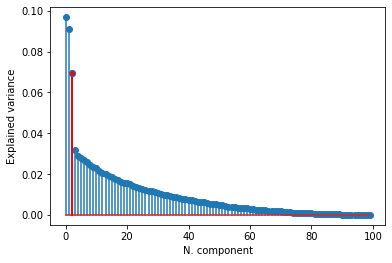

In [5]:
# load data
X = np.loadtxt('data/PCA_5.data')
N_samples = X.shape[0]

# compute covariance matrix
sample_cov = np.cov(X,rowvar=0)

# compute eigenvalue decomposition of covariance matrix. Order eigenvalues if necessary
s,u = np.linalg.eig(sample_cov)
idx_ordered =  np.argsort(s)[::-1]
u = u[:,idx_ordered]  
s = s[idx_ordered]

# plot eigenvalue spectrum
plt.stem(s/sum(s))
markerline, stemlines, baseline = plt.stem([2],[s[2]]/sum(s),'r')
plt.setp(markerline, 'markerfacecolor', 'r')
plt.setp(stemlines, 'linewidth', 2)
plt.xlabel('N. component')
plt.ylabel('Explained variance')



Visually inspecting the eigenvalue spectrum of the covariance matrix do not always provide a clear criterion for the selection of the number of relevant components. If that is the case, an alternative criterion might be used: Typically, the number of PC is selected so as to achieve approximately 90% of accumulated variance. __Note__ that this is only a rule of thumb, values of 95% or 99% are also often seen.

__Q4.1.6: Using the cumulative variance criterion, how many components should be selected for performing dimensionality reduction in the following dataset?__

__Answer:__ Using the 90% cumulative variance criterion, we would select approximately 50 components.

__Hint:__ The eigenvalues represent the variance explained by the corresponding PC.

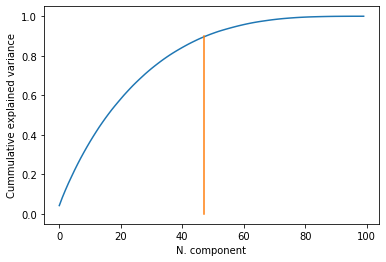

/Users/mariejakob/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/mariejakob/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Text(0.5, 0, 'N. component')

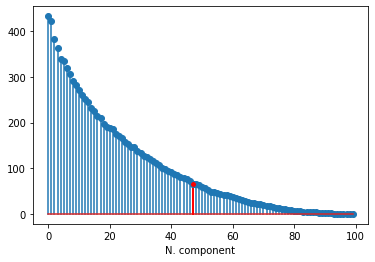

In [6]:
# load data
X = np.loadtxt('data/PCA_6.data')
N_samples = X.shape[0]

#compute covariance matrix
sample_cov = np.cov(X,rowvar=0)

# compute eigenvalue decomposition of covariance matrix. Order eigenvalues if necessary
s,u = np.linalg.eig(sample_cov)
idx_ordered =  np.argsort(s)[::-1]
u = u[:,idx_ordered]  
s = s[idx_ordered]
ncomp = np.where(np.diff((np.cumsum(s)/np.sum(s) >= 0.9).astype(int)))[0]

# plot cummulative eigenvalue spectrum
plt.plot(np.cumsum(s)/np.sum(s))
plt.plot([ncomp,ncomp],[0,0.9])
plt.xlabel('N. component')
plt.ylabel('Cummulative explained variance')
plt.show()

# plot eigenvalue spectrum
plt.stem(s)
markerline, stemlines, baseline = plt.stem(ncomp,s[ncomp],'r')
plt.setp(markerline, 'markerfacecolor', 'r')
plt.setp(stemlines, 'linewidth', 2)
plt.xlabel('N. component')